In [ ]:
from google.colab import files
uploaded = files.upload()
#uploaded = files.upload

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
import pandas as pd


In [29]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [59]:
df.isnull().sum()

,0
Id,0
Model,0
Price,0
Age_08_04,0
Mfg_Month,0
Mfg_Year,0
KM,0
Fuel_Type,0
HP,0
Met_Color,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [32]:
import plotly.express as px
import plotly.graph_objects as go


In [33]:
# Visualize the distribution of the target variable (Price)
fig = px.histogram(df, x='Price', nbins=30, title='Distribution of Car Prices')
fig.show()

In [34]:
# Select relevant columns
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
data = df[selected_columns]

In [35]:
# Visualize the relationship between Price and other features
for col in selected_columns[1:]:
    fig = px.scatter(data, x=col, y='Price', trendline="ols", title=f'Price vs {col}')
    fig.show()

In [36]:
# Visualize a Pair Plot (Scatter Matrix)
fig = px.scatter_matrix(data, dimensions=selected_columns[1:], color="Price", title="Pair Plot of Features")
fig.show()

In [61]:
# 3D Scatter Plot of Price vs Age, KM, and HP
fig = px.scatter_3d(data, x='Age_08_04', y='KM', z='HP', color='Price',
                    title="3D Scatter Plot: Price vs Age, KM, and HP")
fig.show()

In [38]:
# Correlation Heatmap
corr_matrix = data.corr()
fig = px.imshow(corr_matrix, text_auto=True, title="Correlation Heatmap")
fig.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
# Train-Test Split
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [42]:
# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

MAE: 995.59, MSE: 1950244.99, R-squared: 0.85


In [63]:
# Residuals 3D Scatter Plot
results['Residuals'] = results['Actual Price'] - results['Predicted Price']
fig = px.scatter_3d(results, x='Age', y='KM', z='Residuals', color='Residuals',
                    title="3D Scatter Plot of Residuals")
fig.show()


In [46]:
# Box Plot to Visualize Distribution of Prices Across Doors
fig = px.box(data, x='Doors', y='Price', title='Box Plot: Price Distribution by Number of Doors')
fig.show()



In [47]:
# Density Contour Plot of Price vs KM
fig = px.density_contour(data, x='KM', y='Price', title='Density Contour Plot: Price vs KM')
fig.show()


In [48]:
# Sunburst Chart to Explore Price by Categorical Features
data['Doors'] = data['Doors'].astype(str)  # Convert to string for better categorical representation
fig = px.sunburst(data, path=['Doors', 'Gears'], values='Price', title='Sunburst Chart: Price by Doors and Gears')
fig.show()

<ipython-input-48-49c61dad3683>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest MAE: 802.27
Random Forest MSE: 1067630.78
Random Forest R-squared: 0.92


In [51]:
import plotly.express as px

# Calculate residuals
residuals = y_test - y_pred_rf

# Scatter plot of residuals
fig = px.scatter(x=y_test, y=residuals, labels={'x':'Actual Price', 'y':'Residuals'},
                 title="Residuals vs Actual Prices")
fig.show()

# Distribution of residuals
fig = px.histogram(residuals, nbins=30, title='Distribution of Residuals')
fig.show()


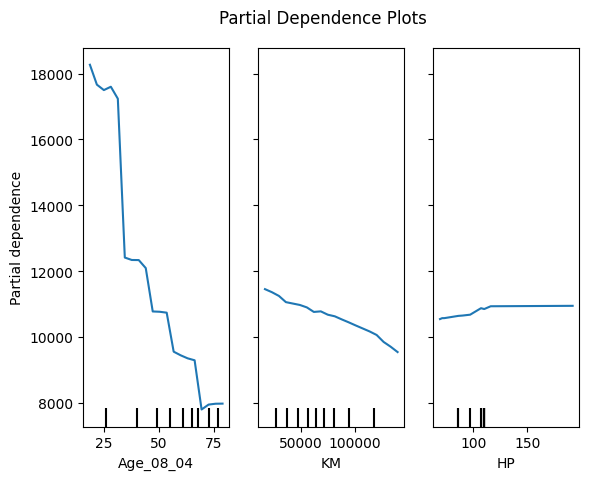

In [53]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Calculate partial dependence
features = ['Age_08_04', 'KM', 'HP']
display = PartialDependenceDisplay.from_estimator(
    best_rf_model, X_train, features, grid_resolution=20
)
display.figure_.suptitle('Partial Dependence Plots')
plt.subplots_adjust(top=0.9)  # Adjust title position if needed
plt.show()

In [55]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.8 MB/s eta 0:00:00


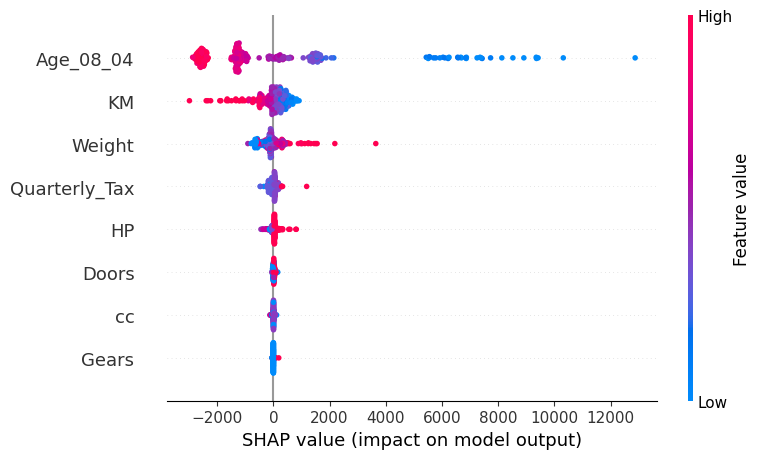

In [56]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(best_rf_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


## Here's an explanation of the project, including its objectives, methodology, and key outcomes. This summary can be used for documentation, presentations, or as part of a portfolio.

---

## **Project Title:** Predicting Car Prices Using Machine Learning

### **Project Overview**

This project aims to build a predictive model to estimate the selling price of Toyota Corolla cars based on various features such as age, mileage, engine specifications, and other characteristics. By using historical data, the model can help potential buyers and sellers make informed decisions and understand the factors that most significantly impact a car's price.

### **Objectives**
- **Primary Objective:** Develop a machine learning model that accurately predicts the price of a Toyota Corolla car based on its features.
- **Secondary Objectives:**
  - Explore and analyze the dataset to understand the relationships between different variables.
  - Use various regression algorithms to determine the best-performing model.
  - Visualize the results to better understand the model's performance and the factors influencing car prices.

### **Dataset**
- **Source:** The dataset consists of records for Toyota Corolla cars, including various attributes related to the car’s condition and specifications.
- **Features Used:**
  - **Price:** The target variable representing the selling price of the car (in EUROs).
  - **Age_08_04:** Age of the car in months as of August 2004.
  - **KM:** Accumulated kilometers on the car's odometer.
  - **HP:** Horsepower of the car.
  - **cc:** Engine cylinder volume in cubic centimeters.
  - **Doors:** Number of doors in the car.
  - **Gears:** Number of gear positions.
  - **Quarterly_Tax:** Quarterly road tax in EUROs.
  - **Weight:** Weight of the car in kilograms.

### **Methodology**

#### **1. Data Preprocessing**
- **Data Cleaning:** Missing values were handled appropriately, and non-numeric columns that were not needed were removed.
- **Feature Selection:** Only the most relevant features were selected to avoid overfitting and improve model performance.
- **Data Splitting:** The dataset was split into training and testing sets to evaluate model performance.

#### **2. Exploratory Data Analysis (EDA)**
- **Descriptive Statistics:** Basic statistical measures were calculated to understand the distribution of features.
- **Correlation Analysis:** A correlation matrix was used to identify relationships between features and the target variable (Price).
- **Visualization:** Histograms, scatter plots, and box plots were used to visualize the distribution and relationships in the data.

#### **3. Model Development**
- **Linear Regression:** A baseline linear regression model was developed to understand the basic relationship between features and price.
- **Random Forest Regression:** An ensemble method was used to capture non-linear relationships and improve accuracy.
- **Hyperparameter Tuning:** Grid Search was used to optimize model parameters for better performance.

#### **4. Model Evaluation**
- **Performance Metrics:** The models were evaluated using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) metrics.
- **Residual Analysis:** The residuals (differences between actual and predicted prices) were analyzed to identify any systematic errors.
- **Advanced Visualization:** 3D surface plots and SHAP values were used to understand the model's predictions and the importance of different features.

### **Key Outcomes**
- **Best Model:** The Random Forest Regressor with optimized hyperparameters provided the best performance, with a lower MAE and higher R² compared to the linear regression model.
- **Feature Importance:** Age, KM, and HP were among the most important features influencing the price, as identified through SHAP values and feature importance analysis.
- **Visualization Insights:** 3D surface plots showed how the predicted price varies with age and mileage, giving a clear visual representation of the model's behavior.

### **Conclusion**
The project successfully built a predictive model for estimating the price of Toyota Corolla cars. The Random Forest model, enhanced by hyperparameter tuning, was found to be the most accurate. The analysis provided valuable insights into the key factors affecting car prices, which can be used by buyers, sellers, and dealerships to make informed decisions.

### **Future Work**
- **Incorporate More Data:** Include additional features such as car brand, condition, and regional market trends to improve model accuracy.
- **Expand to Other Car Models:** Apply the model to predict prices for other car models or brands.
- **Real-Time Prediction:** Integrate the model into a web application for real-time price predictions, making it accessible to end-users.

---

This explanation should give a comprehensive overview of project, making it suitable for documentation or presentation purposes.